# Predicting House Price 🏠

🎯 In this challenge, you will **predict the sale price** of houses (`SalePrice`) according to the *surface*, the *number of bedrooms* or the *overall quality*.

## Load Python Libraries

Run the cell below to `import` some Python libraries - these will be our tools for working with data 📊


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

--------------

## Load the Dataset

👇 Run the cell below to load the `house_prices.csv` dataset into this notebook as a pandas `DataFrame`, and display its first 5 rows.

*Note: the datasets has been cleaned and federated for learning purposes*

In [61]:
houses = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/house-prices.csv')
houses.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual,SalePrice
0,1710,3,1,7,208500
1,1262,3,1,6,181500
2,1786,3,1,7,223500
3,1717,3,1,7,140000
4,2198,4,1,8,250000


This dataset contains information about houses sold.

The *columns* in the given dataset are as follows:

*Features:*
- `GrLivArea`: Surface in squared feet
- `BedroomAbvGr`: Number of bedrooms
- `KitchenAbvGr`: Number of kitchens
- `OverallQual`: Overall quality (1: Very Poor / 10: Very Excellent)

*Target:*
- `SalePrice`: Sale price in USD

--------------

## We can get a lot of insight without ML! 🤔

### Your turn! 🚀

Let's start by **understanding the data we have** - how big is the dataset, what is the information (columns) we have and so on:

**💡 Tip:** remember to check the slides for the right methods ;)

In [62]:
print("There are {} rows and {} columns in the dataset.".format(houses.shape[0], houses.shape[1]))

from collections import Counter # counts the number of times each value appears in a list

bedrooms = Counter(houses['BedroomAbvGr']) 

# Now we can print it, in order of most common number of bathrooms to least common. 
print("\nNumber of bedrooms in the dataset:")
for bedroom, count in bedrooms.most_common():
    print("\tThere are {} houses with {} bedrooms".format(count, bedroom))

# now we can do the same thing for the kitchens on the column 'KitchenAbvGr'
kitchens = Counter(houses['KitchenAbvGr'])

print("\nNumber of kitchens in the dataset:")
for kitchen, count in kitchens.most_common():
    print("\tThere are {} houses with {} kitchens".format(count, kitchen))

There are 1759 rows and 5 columns in the dataset.

Number of bedrooms in the dataset:
	There are 958 houses with 3 bedrooms
	There are 425 houses with 2 bedrooms
	There are 265 houses with 4 bedrooms
	There are 64 houses with 1 bedrooms
	There are 27 houses with 5 bedrooms
	There are 10 houses with 0 bedrooms
	There are 9 houses with 6 bedrooms
	There are 1 houses with 8 bedrooms

Number of kitchens in the dataset:
	There are 1671 houses with 1 kitchens
	There are 85 houses with 2 kitchens
	There are 2 houses with 3 kitchens
	There are 1 houses with 0 kitchens


Now try to **separate only some columns** - say we only want to see `SalePrice`, or `GrLivArea` and `BedroomAbvGr`:

In [63]:
print("Here are the first 5 rows of the 'SalePrice' column:", houses['SalePrice'].head())

Here are the first 5 rows of the 'SalePrice' column: 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [64]:
print("Here are the first 5 rows of the 'GrLivArea' column:", houses['GrLivArea'].head())

Here are the first 5 rows of the 'GrLivArea' column: 0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64


In [65]:
print("Here are the first 5 rows of the 'BedroomAbvGr' column:", houses['BedroomAbvGr'].head())

Here are the first 5 rows of the 'BedroomAbvGr' column: 0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64


### Your turn - Now let's do some **visualization** 📊. 


Let's follow some basic intuition - **does the surface (`GrLivArea`) affects the price of the house(`SalePrice`)❓**

Let's use a [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - a method inside the Seaborn library (which we imported above and shortened to `sns`) that gives us a graph with data points as dots with `x` and `y` values.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

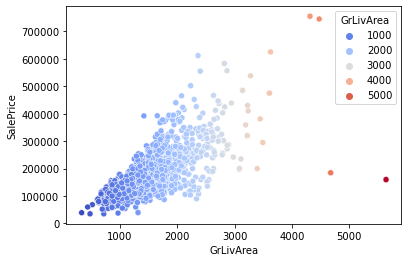

In [66]:
sns.scatterplot(
    x=houses['GrLivArea'], 
    y=houses['SalePrice'], 
    hue=houses['GrLivArea'],
    palette='coolwarm'
)

Does the **overall quality (`OverallQual`) has an impact on the `SalePrice` ❓**

**💡Tip:** You can add a `hue` to the previous graph

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

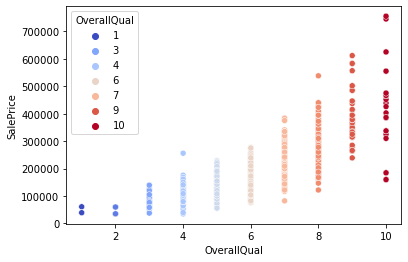

In [67]:
sns.scatterplot(
    x=houses['OverallQual'],
    y=houses['SalePrice'],
    hue=houses['OverallQual'],
    palette='coolwarm'
)

Let's also understand the repartition we have for some features:

- **What is the repartition of the Number of bedrooms❓**
- **What is the repartition of the Number of kitchens❓**

Seaborn `countplot` is here to help with that.

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

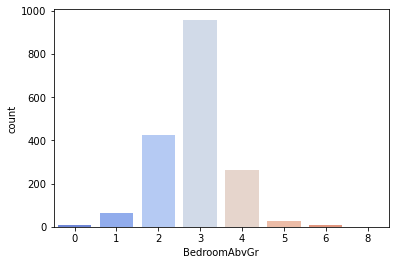

In [68]:
sns.countplot(x=houses['BedroomAbvGr'], palette='coolwarm')

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='count'>

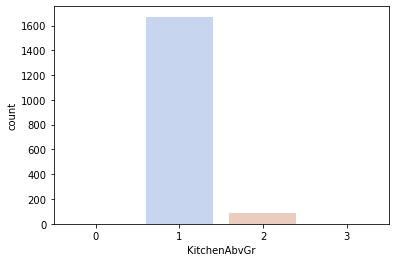

In [69]:
sns.countplot(x=houses['KitchenAbvGr'], palette='coolwarm')

--------------

## Your first model - Linear Regression 📈

**1.** First, let's create what will be our features and our target.

Create a variable `features` containing all features:

In [70]:
features = ['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']

Create a variable `target` containing the target:

In [71]:
target = ['SalePrice']

Feel free to check what is in your `features` and `target` below:

In [72]:
print("Features: ", features)
print("Target: ", target)

Features:  ['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']
Target:  ['SalePrice']


--------------

**2.** Time to **import** the *sklearn* function to split our dataset into a train and a test set

Try to find the right function [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [73]:
from sklearn.model_selection import train_test_split

--------------

**3.** Use this function to create **X_train, X_test, y_train, y_test**

🚨 Set `random_state=42` as an argument of the function.

In [74]:
# Use this function to create X_train, X_test, y_train, y_test. Set random_state=42

X_train, X_test, y_train, y_test = train_test_split(houses[features], houses[target], random_state=42)

Let's check what is in your `X_train`, `X_test`, `y_train`, `y_test`:

- What percentage of the observations were allocated to the train and the test set?
- How many features in `X_train` and `X_test`?

In [75]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1319, 4)
X_test shape:  (440, 4)
y_train shape:  (1319, 1)
y_test shape:  (440, 1)


In [76]:
# What percentage of the observations were allocated to the train and the test set? 
print("Percentage of observations in the training set: ", round(X_train.shape[0] / houses.shape[0] * 100, 2), "%")
print("Percentage of observations in the test set: ", round(X_test.shape[0] / houses.shape[0] * 100, 2), "%")

Percentage of observations in the training set:  74.99 %
Percentage of observations in the test set:  25.01 %


--------------

**4.** Time to **import** the Linear Regression model

Python libraries like [Scikit-learn](https://scikit-learn.org/0.21/modules/classes.html) make it super easy for people getting into Data Science and ML to experiment.

The code is already in the library, it's just about **calling the right methods!** 🛠

In [77]:
from sklearn.linear_model import LinearRegression

Now to **initialize** the model. Store it in a variable `model`:

In [78]:
model = LinearRegression()

--------------

**5. Train** the model on the **training set**. 

This is the process where the Linear Regression model looks for a line that best fits all the points in the dataset. This is the part where the computer is hard at work **learning**! 🤖

In [79]:
# train the model on the training set

model.fit(X_train, y_train)

LinearRegression()

--------------

**6. Evaluate** the performance of the model on the **test set**.

Models can have different default scoring metrics. Linear Regression by default uses something called `R-squared` - a metric that shows how much of change in the target (`SalePrice`) can be explained by the changes in features (`GrLivArea`, `BedroomAbvGr`, `KitchenAbvGr` and `OverallQual`)

In [80]:
print("R-squared value for the test set: ", round(model.score(X_test, y_test), 2))

R-squared value for the test set:  0.69


⚠️ **Careful not to confuse this with accuracy**. The above number is shows that **"the inputs we have can help us predict this percentage of change in the depreciation"** Which is decent considering we did with just a few lines of code! 

Let's **compare** this score to the one the model gets on the **training set**:

In [81]:
print("R-squared value for the training set: ", round(model.score(X_train, y_train), 2))

# the difference between the two scores is called the generalization error and in this case is 

print("Generalization error: ", round(model.score(X_train, y_train) - model.score(X_test, y_test), 2))

R-squared value for the training set:  0.73
Generalization error:  0.04


👉 You should get a slightly higher score on the training set, which is to be expected in general.

The good news is that the 2 scores are relatively close to each other, which shows that we achieved a **good balance**, our model **generalises well to new observations**, explaining more than 70% of change in depreciation.

**Splitting the dataset into a training set and a test set is essential in Machine Learning**. It allows us to **identify**:
- **Overfitting**: we would see a large difference between the 2 scores. The model would be very good on the data it trained on, but would be doing poorly on the test set.
- **Underfitting**: we would have bad score on both the training data and on the test data. In this case, a reason could be that the model is not complex enough to capture the patterns in the data.

In our case, we have a **robust model** that does well on new observations💪. We can now use it to make predictions on new houses with confidence.

--------------

**7.** Let's **predict** the price of a new house 🔮

This new house has a the following characteristics:
- **Surface** of 3,000 squared feet
- 3 **bedrooms**
- 1 **kitchen**
- **Overall quality** score of 5

**7.1** Start by creating variable `new_house` in which you will store those characteristics. Make sure to use the right format to be able to make a prediction.

*Note: here is a reminder of the columns in the table:* `['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']`


<details>
    <summary>💡Hint</summary>
<p> 
<pre>
`new_house` should be a `list of list`:
    [[surface, nb_bedrooms, nb_kitchens, overall_quality]]
</pre>
</details>

In [82]:
new_house = [[3000, 3, 1, 5]]

**7.2** Now use the right method to make a prediction using the model we just trained:

In [83]:
# make a prediction for the new house using the model you trained

prediction = model.predict(new_house)

print("The predicted price for the new house is: ", round(prediction[0][0],1), "dollars")

The predicted price for the new house is:  250739.4 dollars


Now let's say we have another house with the same characteristics, except for the overall quality score being 9. 

**What would be the price of this house❓**

In [84]:
new_house2 = [[3000, 3, 1, 9]]
prediction2 = model.predict(new_house2)

print("The predicted price for the new house is: ", round(prediction2[0][0],1), "dollars")

The predicted price for the new house is:  373362.6 dollars


--------------

**8.** **Explaining** the model

Linear Regression is a [linear model](https://scikit-learn.org/stable/modules/linear_model.html), so it's explainability is quite high.

**8.1.** We can check the `coef_` or the **coefficients** of the model. These explain how much the target (`SalePrice`) changes with a change of `1` in each of the features (inputs), while holding other features constant.

In [85]:
print("The coefficients of the model are: ", model.coef_)

The coefficients of the model are:  [[    69.70950885 -12154.48605308 -22959.87354252  30655.79706955]]


🤔 We'd need to check the column order again, to know which number is which input. But, **we got you covered!** Run the cell below:

In [86]:
pd.concat([pd.DataFrame(features),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,GrLivArea,69.709509
1,BedroomAbvGr,-12154.486053
2,KitchenAbvGr,-22959.873543
3,OverallQual,30655.797070


**8.2** The other thing we can check is the **intercept** of the model. This is the target (`SalePrice`) for when all inputs are 0. So this should be close to a new house with a surface of 0 squared feet, no bedrooms, no kitchens and an overall quality of 0:

In [87]:
print("The intercept of the model is: ", model.intercept_)

The intercept of the model is:  [-52244.77120892]
